# Using Python Visualizations to explore the Women's Empowerment Index

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

path = r'/Users/amritambe/Desktop/Analysis_Project/Women_Empowerment/2 Data'

#read in paid child leave data
df = pd.read_csv(os.path.join(path, 'Clean_Data', '11_10_2023_WEI.csv'))

print(f'Imported data was successful and has shape: {df.shape}')


Imported data was successful and has shape: (336545, 17)


- clean dataframe

In [3]:
df.columns.tolist()

['Unnamed: 0',
 'Country_Name',
 'Year',
 'GDP_Growth',
 'Index_1971',
 'Index_2020',
 'Fifty_Year_Change',
 'Region',
 'Income_group',
 'Question_Category',
 'Question',
 'Score_y',
 'Rank',
 '1GB_Price_Usd',
 'LifeExp',
 'Population',
 'GDP_Per_Cap']

In [4]:
#Make df columns consistent, drop index
df = df.drop(columns='Unnamed: 0', axis=1).copy()
df = df.rename(columns={'Score_y':'WEI_Score', 'Rank':'1GB_Rank'})
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype('int32')

df.isna().sum()

Country_Name              0
Year                      0
GDP_Growth            59044
Index_1971             4030
Index_2020             4030
Fifty_Year_Change      4030
Region                 4030
Income_group           4030
Question_Category      4030
Question               4030
WEI_Score              4030
1GB_Rank              98330
1GB_Price_Usd         98330
LifeExp              300306
Population           300306
GDP_Per_Cap          300306
dtype: int64

- feature engineering

Text(0.5, 1.0, 'df["Avg_WEI_Score"].plot(kind="hist")')

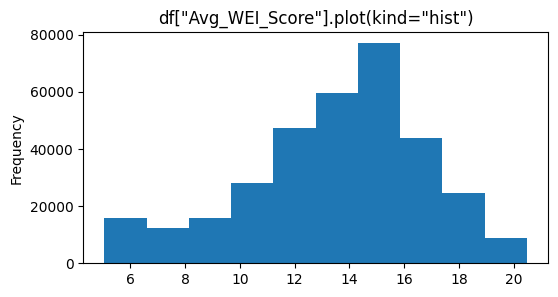

In [5]:
df['Avg_WEI_Score'] = df.groupby('Country_Name')['WEI_Score'].transform('mean')
df = df.dropna(subset=['Avg_WEI_Score']).copy()


plt.figure(figsize=(6,3))

df['Avg_WEI_Score'].plot(kind='hist')
plt.title('df["Avg_WEI_Score"].plot(kind="hist")')

# Question 1: Index
- How have the gender empowerment scores evolved over the years, and are
there regions or income groups where progress in women's empowerment has
been slower than others?

## Regional differences:
- Here we have differentiated the points on the plot by Region, and it becomes clear that there are some regions that are lagging behind in the Women Empowerment Index. 
- It's interesting that there seems to be a strong correlation for higher avg index score in those countries with higher 1971 index scores.
- The average Index score histogram by Region shows outliers well
- Comparing the '71 and '20 index histograms by region shows the 50 year change well.


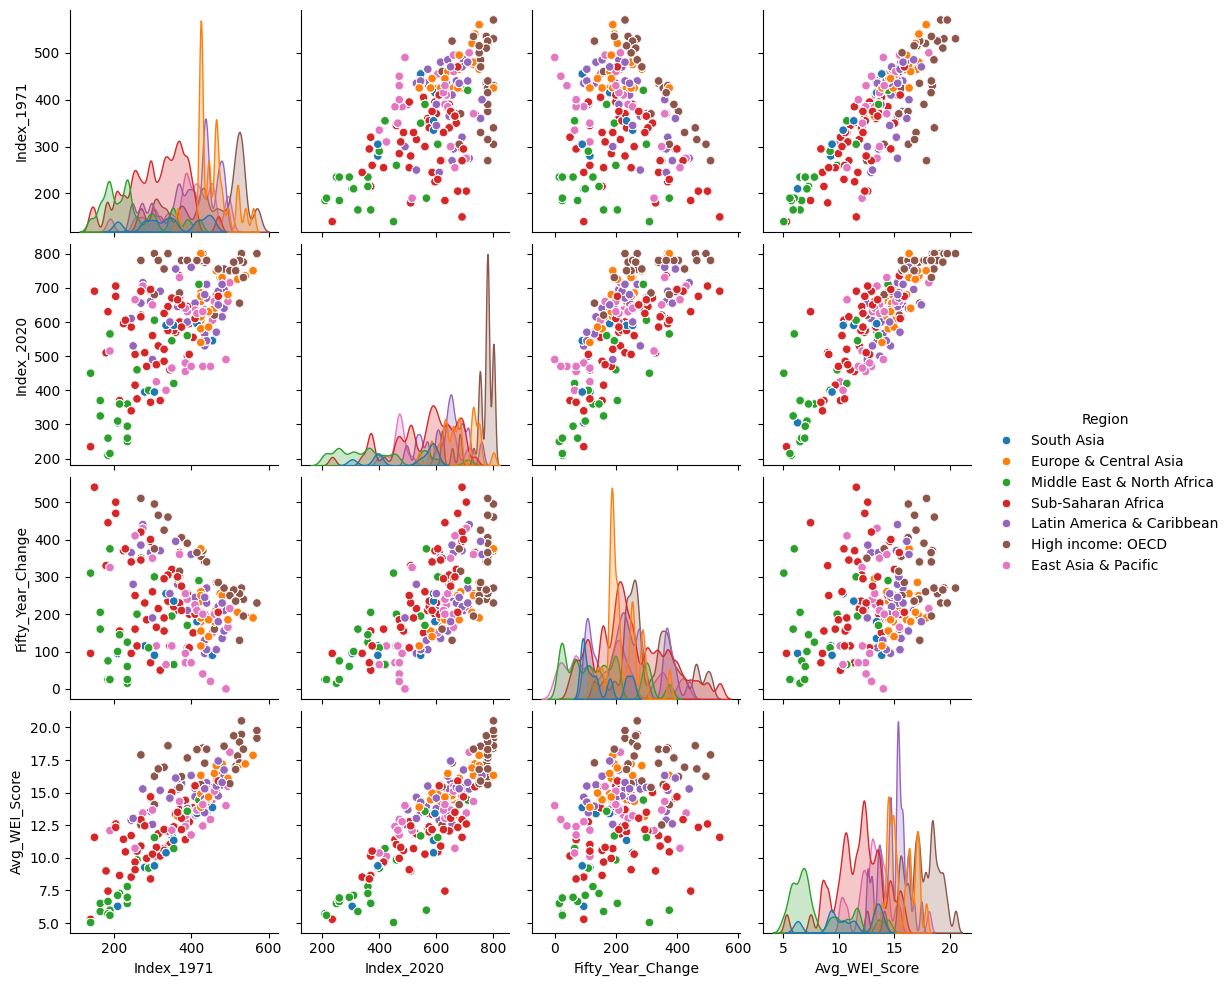

In [6]:
sns.pairplot(df[[
 # 'Year',
 #'GDP_Growth',
 'Index_1971',
 'Index_2020',
 'Fifty_Year_Change',
 'Region',
 'Income_group',
 # 'Question_Category',
 # 'Question',
 # 'WEI_Score',
 # '1GB_Rank',
 # '1GB_Price_Usd',
 # 'LifeExp',
 # 'Population',
 # 'GDP_Per_Cap',
'Avg_WEI_Score']], hue='Region')

## Income group differences:
- Here we have the same pair plot, but the colors are set to differentiate by income groups
- There does seem to be a slight relation between higher index scores and income. 
- High income average index score does seem to have a cluster of low index scores, further analysis needed 

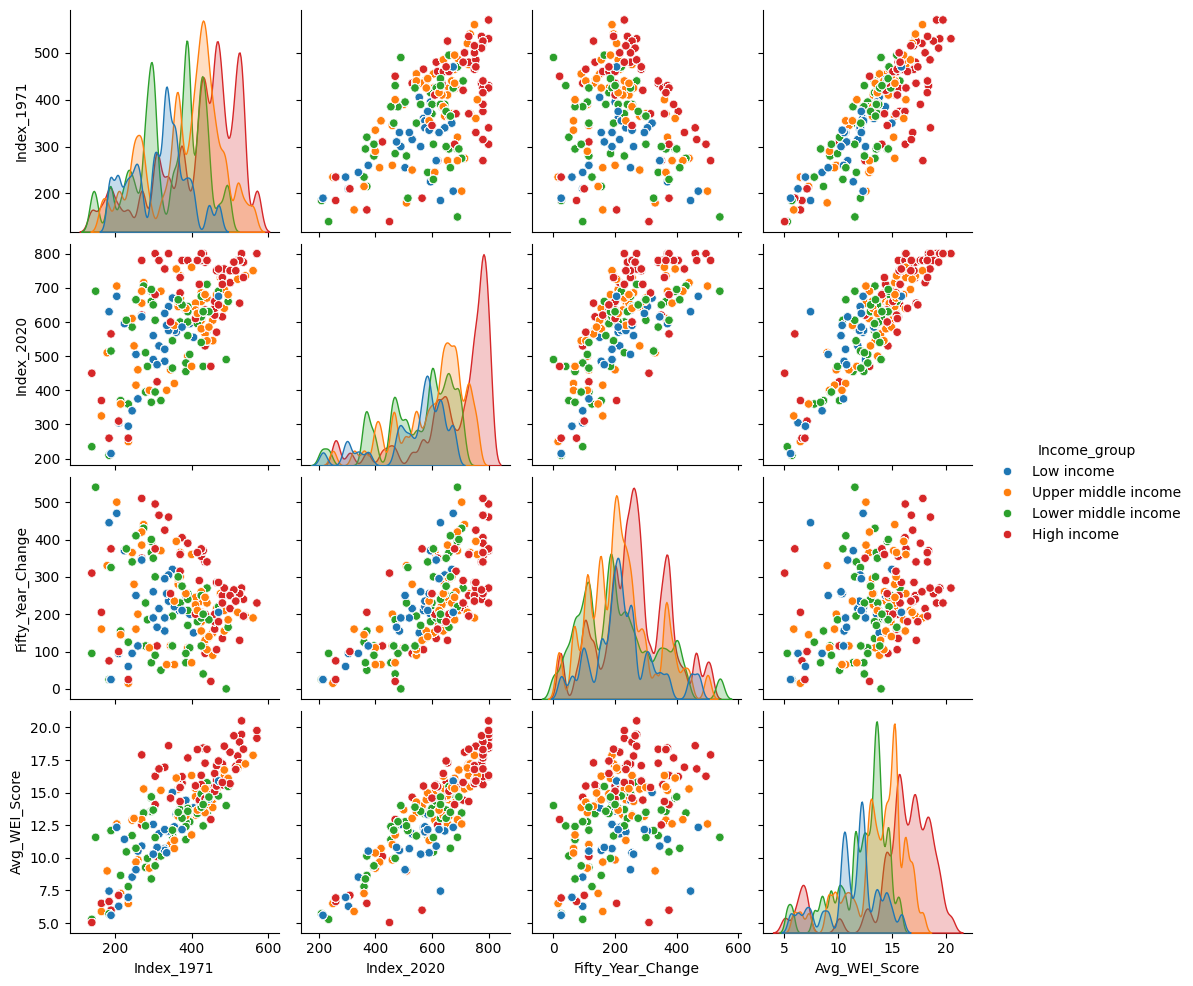

In [7]:
sns.pairplot(df[[
 # 'Year',
 #'GDP_Growth',
 'Index_1971',
 'Index_2020',
 'Fifty_Year_Change',
 'Region',
 'Income_group',
 # 'Question_Category',
 # 'Question',
 # 'WEI_Score',
 # '1GB_Rank',
 # '1GB_Price_Usd',
 # 'LifeExp',
 # 'Population',
 # 'GDP_Per_Cap',
'Avg_WEI_Score']], hue='Income_group')

 # Question 2: GDP
 - How has GDP growth evolved over the years, and are there regions or income
groups where growth has been slower than others?

# Regional GDP per cap Differences
- The life expectancy histogram, by Region, shows the stark difference between Sub-Saharan Africa and OECD countries.
- A regional analysis of life exp/gdp per cap would be interesting- it looks like there is regional clustering
- There are two countries in the middle east that stand as outliers in gdp per capita. 
- There are two countries in sub-saharan africa that stand out as outliers in lifeexp/ gdp growth

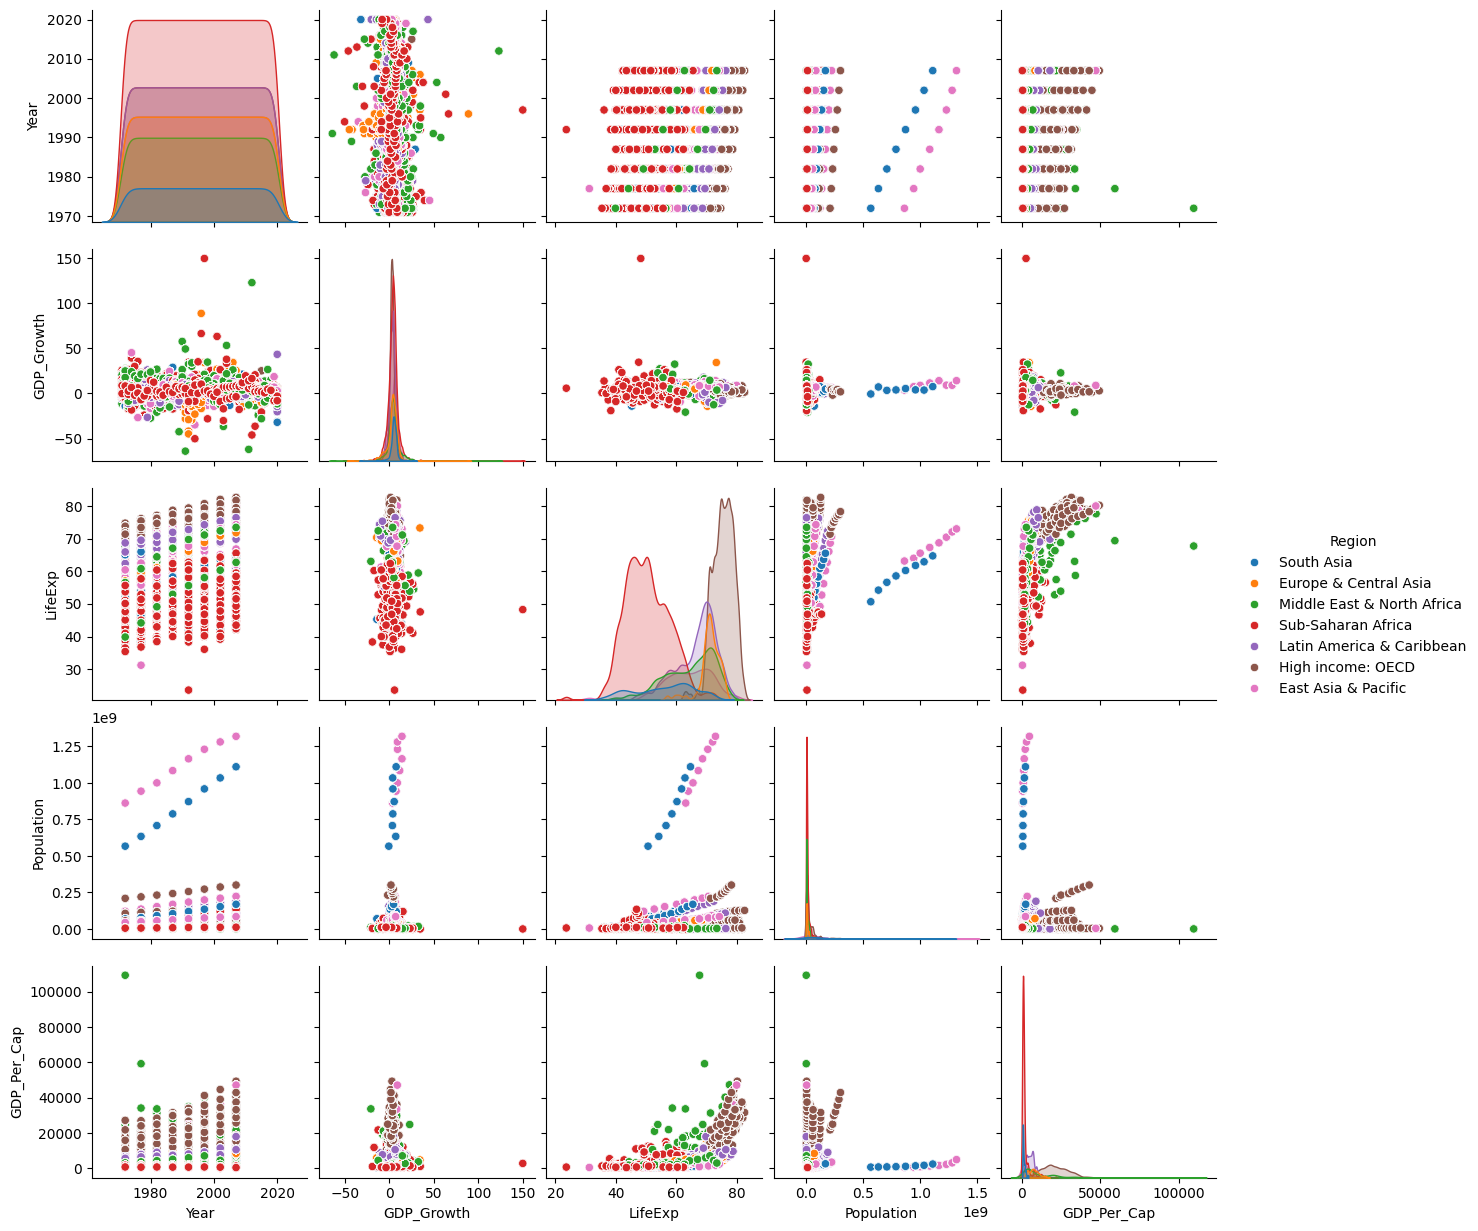

In [8]:
sns.pairplot(df[[
 'Year',
 'GDP_Growth',
 # 'Index_1971',
 # 'Index_2020',
 # 'Fifty_Year_Change',
 'Region',
 'Income_group',
 # 'Question_Category',
 # 'Question',
 # 'WEI_Score',
 # '1GB_Rank',
 # '1GB_Price_Usd',
 'LifeExp',
 'Population',
 'GDP_Per_Cap',
# 'Avg_WEI_Score'
]], hue='Region')

In [9]:
score_na = df.query('Avg_WEI_Score.isna()')['Country_Name'].unique()
score = df.query('Avg_WEI_Score.notna()')['Country_Name'].unique()

set1 = set(score_na)
set2 = set(score)

dif_countries = set2 - set1

same_countries = [country for country in score_na if country in score]

print(f'How many countries avg_WEI_score is na? \n\
there are {len(score_na)} with na values, and {len(score)} without.\n\
(set2: {len(set2)} set1: {len(set1)}) subtracting  leaves {len(dif_countries)} countries in set2. \n\
there are {len(same_countries)} similar countries')

How many countries avg_WEI_score is na? 
there are 0 with na values, and 190 without.
(set2: 190 set1: 0) subtracting  leaves 190 countries in set2. 
there are 0 similar countries


The two outlier GDP per capita countries in the middle east are Kuwait in 1972 and 1977: 
   Year  Country_Name   GDP_Per_Cap
0  1972        Kuwait  109347.86700
1  1977        Kuwait   59265.47714
2  2007        Kuwait   47306.98978
3  1997        Kuwait   40300.61996
4  2002        Kuwait   35110.10566
5  1992        Kuwait   34932.91959
6  1977  Saudi Arabia   34167.76260
7  1982  Saudi Arabia   33693.17525
8  1982        Kuwait   31354.03573
9  2007       Bahrain   29796.04834
Kuwait has the 7 of the 10 hightest gdp per cap years in the dataset.


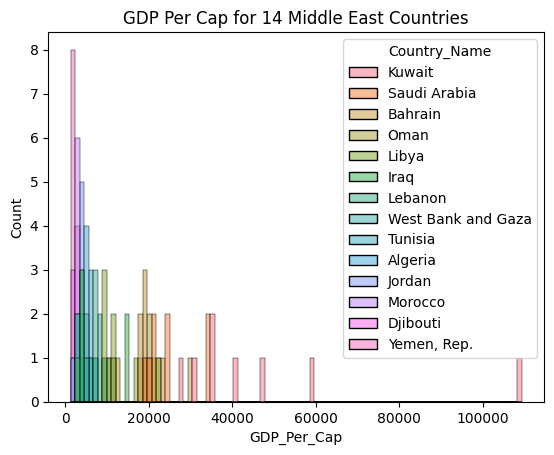

In [10]:
# explore the outlying countries - Middle East



#query to explore 
#resetting and dropping the index was required twice, 
#first to make a dataframe and second to order the dataframe by max gdppercap

mid_e = df.query('Region.str.contains("Middle")') \
.groupby(['Year', 'Country_Name'])['GDP_Per_Cap'] \
.max() \
.reset_index() \
.sort_values('GDP_Per_Cap', ascending=False) \
.dropna() \
.reset_index(drop=True) \
.copy()   

sns.histplot(data=mid_e, x='GDP_Per_Cap', bins=100, hue='Country_Name')
plt.title(f'GDP Per Cap for {mid_e["Country_Name"].nunique()} Middle East Countries')
plt.show
print(f'The two outlier GDP per capita countries in the middle east are Kuwait in 1972 and 1977: \n{mid_e.head(10)}\n\
Kuwait has the 7 of the 10 hightest gdp per cap years in the dataset.')

5 out of 10 top years of GDP Growth are from Equatorial Guinea, with 1997 growth ~150%: 
   Year       Country_Name  GDP_Growth
0  1997  Equatorial Guinea  149.972963
1  1996  Equatorial Guinea   66.579997
2  2001  Equatorial Guinea   63.379875
3  1974              Gabon   39.487095
4  2004  Equatorial Guinea   37.998727
5  1976              Gabon   35.625338
6  1995             Rwanda   35.224078
7  1992  Equatorial Guinea   34.745320
8  2004               Chad   33.629372
9  1975            Somalia   30.073699


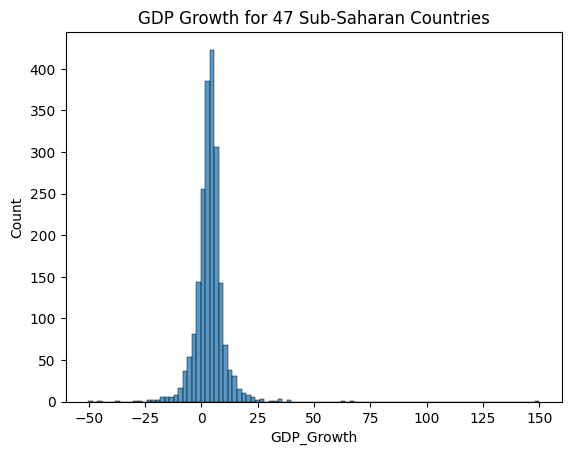

In [11]:
#same exploration for africa and life exp/ gdp growth
#gdp growth
afr_g = df.query('Region.str.contains("Sub-S")') \
.groupby(['Year', 'Country_Name'])['GDP_Growth'] \
.max() \
.reset_index() \
.sort_values('GDP_Growth', ascending=False) \
.dropna() \
.reset_index(drop=True) \
.copy()   

sns.histplot(data=afr_g, x='GDP_Growth', bins=100)
plt.title(f'GDP Growth for {afr_g["Country_Name"].nunique()} Sub-Saharan Countries')
plt.show
print(f'5 out of 10 top years of GDP Growth are from Equatorial Guinea, with 1997 growth ~150%: \n{afr_g.head(10)}')

   Year   Country_Name  LifeExp
0  1992         Rwanda   23.599
1  1972   Sierra Leone   35.400
2  1997         Rwanda   36.087
3  1972  Guinea-Bissau   36.486
4  1977   Sierra Leone   36.788
5  1977  Guinea-Bissau   37.465
6  1972         Angola   37.928
7  1992   Sierra Leone   38.333
8  1982   Sierra Leone   38.445
9  1972         Guinea   38.842


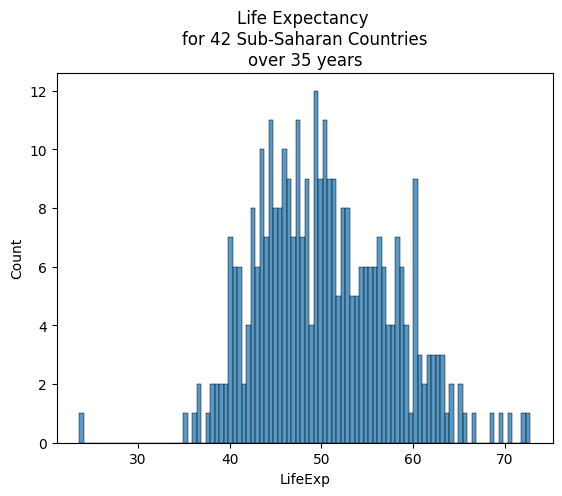

In [12]:
#same exploration for africa and life exp/ gdp
#life exp
afr_l = df.query('Region.str.contains("Sub-S")') \
.groupby(['Year', 'Country_Name'])['LifeExp'] \
.max() \
.reset_index() \
.sort_values('LifeExp', ascending=True) \
.dropna() \
.reset_index(drop=True) \
.copy()   

#seaborn histogram
sns.histplot(data=afr_l, x='LifeExp', bins=100)

#title w fstrings
plt.title(f'Life Expectancy \nfor {afr_l["Country_Name"].nunique()} Sub-Saharan Countries\n\
over {afr_l["Year"].max()-afr_l["Year"].min():0.0f} years')

plt.show

print(f'{afr_l.head(10)}')

# Question 3: Index/GDP
- How has the Global Women's Empowerment Index correlated with GDP
growth over the last 50 years? Are there patterns that suggest a causal
relationship?

# Correlation between WE Index and GDP measures
- GDP growth is not strongly correlated with anything
- Avg WEI score is slightly correlated with life expectancy and gdp per capita
  - this indicates that while higher WEI scores do not necessarily align with overall economic growth, they are associated with a more equitable distribution of economic resources.
- The highest correlation here is life expectancy and gdp per capita. next highest is avg WEI score and life expectancy
  - The three variables to look at are *life expectancy, gdp per capita, and the Women's Empowerment Index Scores*. 

Text(0.5, 1.0, 'Heatmap for GDP and WE-Index')

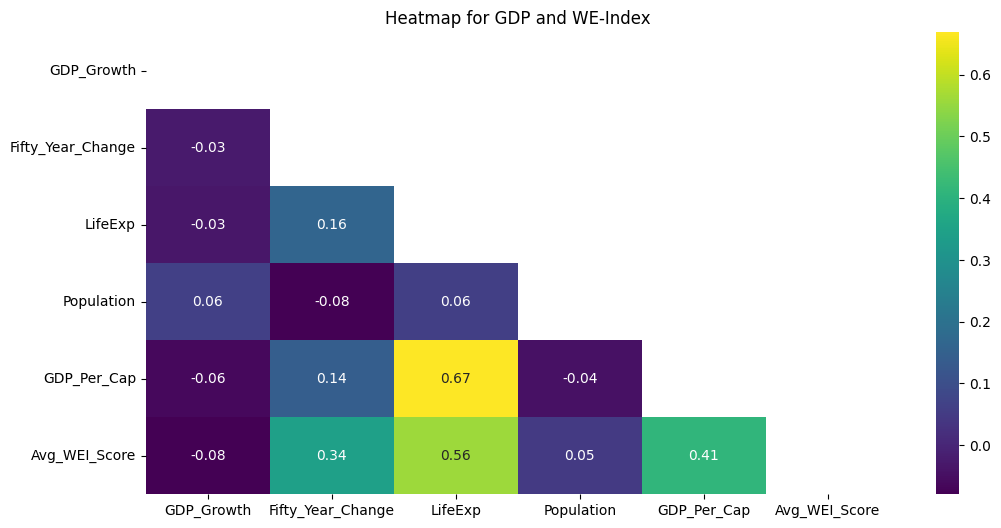

In [13]:
#use heatmap to determine the correlations between gdp growth, gdp per cap, and avg wei score, fifty year index change
gdp_wei = df[[
 # 'Year',
 'GDP_Growth',
 # 'Index_1971',
 # 'Index_2020',
 'Fifty_Year_Change',
 # 'Region',
 # 'Income_group',
 # 'Question_Category',
 # 'Question',
 # 'WEI_Score',
 # '1GB_Rank',
 # '1GB_Price_Usd',
 'LifeExp',
 'Population',
 'GDP_Per_Cap',
'Avg_WEI_Score']]

#generate correlation number matrix
heatmap = gdp_wei.corr()

#generate mask for upper triangle
mask = np.triu(heatmap)


plt.figure(figsize=(12,6))

sns.heatmap(heatmap, cmap='viridis', annot=True, fmt=".2f", mask=mask)
plt.title('Heatmap for GDP and WE-Index')

# LifeExp, GDP per Cap, Avg Index Scores
- Here we see the most correlated features in a pairplot
- 

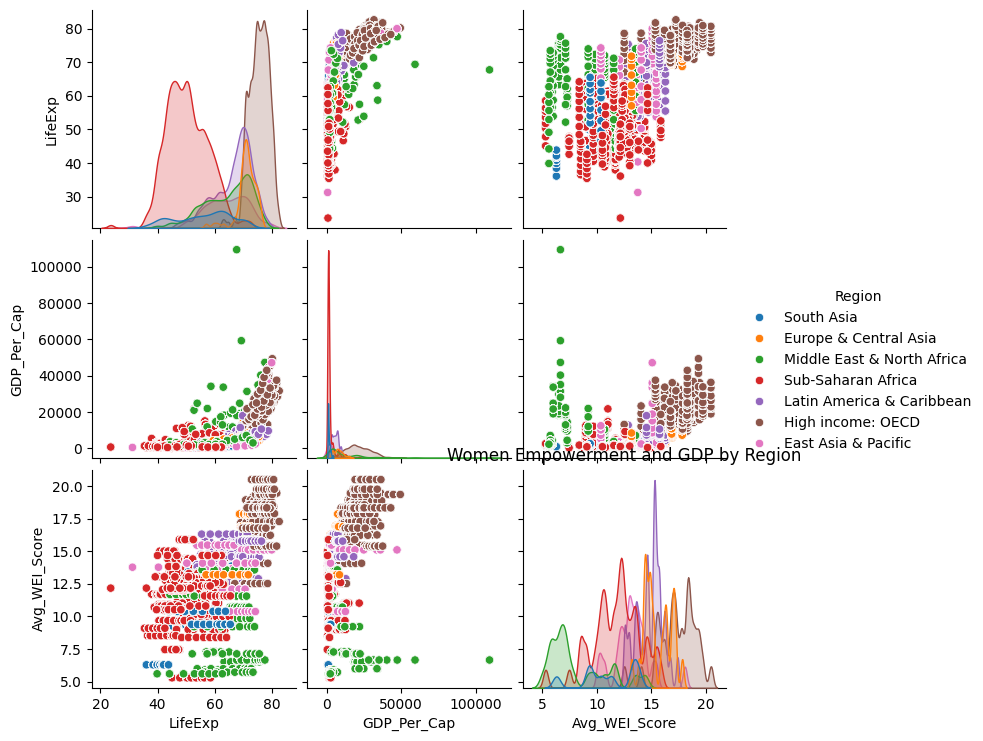

In [58]:
#create pair plot for regional analysis

sns.pairplot(data=df[['Region','LifeExp','GDP_Per_Cap', 'Avg_WEI_Score']], hue='Region')
plt.title('Women Empowerment and GDP by Region')
index_gdp_pair = plt.gca()

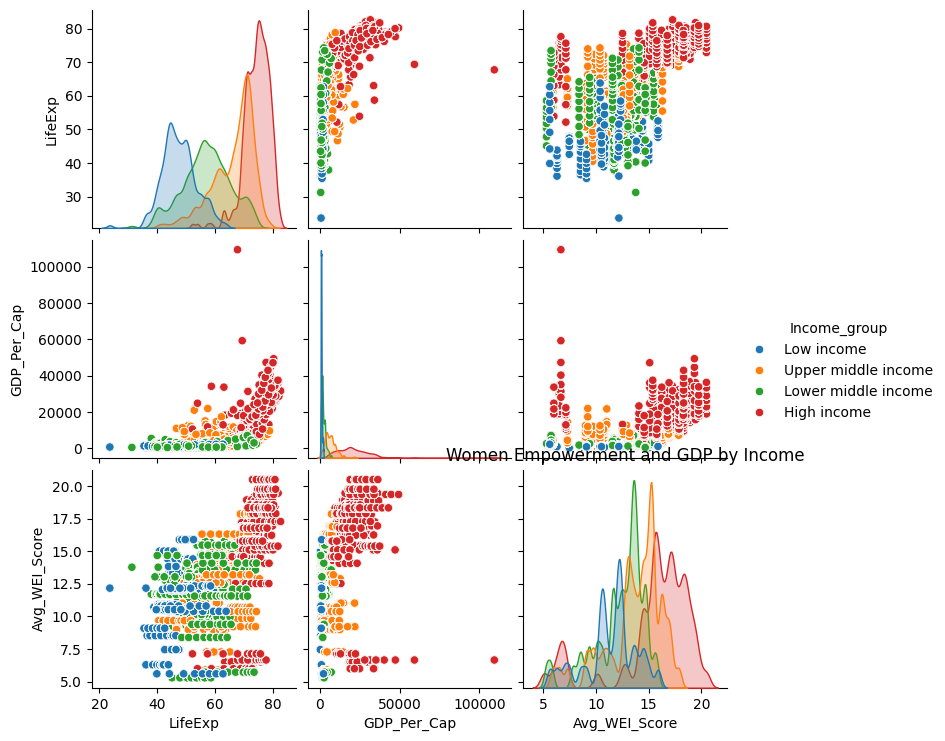

In [59]:
#create pair plot for income group analysis

sns.pairplot(data=df[['Income_group','LifeExp','GDP_Per_Cap', 'Avg_WEI_Score']], hue='Income_group')
plt.title('Women Empowerment and GDP by Income')
index_gdp_inc = plt.gca()

# Question 4: Categories and GDP
- Among the 8 categories in the Women's Empowerment Index, which ones
show the strongest correlation with GDP growth, and which show the
weakest?
- *Marriage* has the lowest correlation at -0.053
- *Pension* has the highest correlation at -0.016
- none of the variables are very correlated with GDP Growth,
  - so lets check GDP Per Cap
- *Mobility* has the lowest correlation at 0.073
- *Assets* has the highest correlation at 0.216


In [54]:
q_cat_growth = df.groupby('Question_Category')[['GDP_Growth', 'WEI_Score']].corr()
q_cat_growth

GDP_Growth  WEI_Score
Question_Category                                  
Assets            GDP_Growth    1.000000  -0.035054
                  WEI_Score    -0.035054   1.000000
Entrepreneurship  GDP_Growth    1.000000  -0.032868
                  WEI_Score    -0.032868   1.000000
Marriage          GDP_Growth    1.000000  -0.053322
                  WEI_Score    -0.053322   1.000000
Mobility          GDP_Growth    1.000000  -0.043966
                  WEI_Score    -0.043966   1.000000
Parenthood        GDP_Growth    1.000000  -0.049714
                  WEI_Score    -0.049714   1.000000
Pay               GDP_Growth    1.000000  -0.028933
                  WEI_Score    -0.028933   1.000000
Pension           GDP_Growth    1.000000  -0.016472
                  WEI_Score    -0.016472   1.000000
Workplace         GDP_Growth    1.000000  -0.043727
                  WEI_Score    -0.043727   1.000000

In [55]:
q_cat_pcap = df.groupby('Question_Category')[['GDP_Per_Cap', 'WEI_Score']].corr()
q_cat_pcap

GDP_Per_Cap  WEI_Score
Question_Category                                    
Assets            GDP_Per_Cap     1.000000   0.216035
                  WEI_Score       0.216035   1.000000
Entrepreneurship  GDP_Per_Cap     1.000000   0.131003
                  WEI_Score       0.131003   1.000000
Marriage          GDP_Per_Cap     1.000000   0.162431
                  WEI_Score       0.162431   1.000000
Mobility          GDP_Per_Cap     1.000000   0.073587
                  WEI_Score       0.073587   1.000000
Parenthood        GDP_Per_Cap     1.000000   0.207034
                  WEI_Score       0.207034   1.000000
Pay               GDP_Per_Cap     1.000000   0.171391
                  WEI_Score       0.171391   1.000000
Pension           GDP_Per_Cap     1.000000   0.129089
                  WEI_Score       0.129089   1.000000
Workplace         GDP_Per_Cap     1.000000   0.199357
                  WEI_Score       0.199357   1.000000

# Question 5: WEI Category Growth
- In which specific categories of the Women's Empowerment Index have women
made the most significant strides, and where is there still room for improvement?
- All categories have grown substantially
- Workplace Empowerment has been a key leader in growth, especially after 2000.
  - Pay and Marriage empowerment also show significant growth after 2000

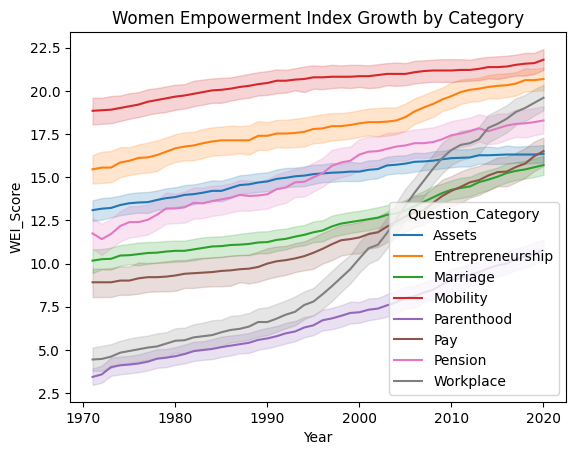

In [57]:
sns.lineplot(data=df, x='Year', y='WEI_Score', hue='Question_Category')
plt.title('Women Empowerment Index Growth by Category')
plt.show()


# Hypotheses 
Correlation with GDP Measures:

- Null Hypothesis: There is no significant correlation between Women's Empowerment Index scores and GDP per capita.
- Alternative Hypothesis: There exists a mild but statistically significant correlation between Women's Empowerment Index scores and GDP per capita.

Effect of Outliers in the Middle East:

- Null Hypothesis: The presence of outlier countries in the Middle East does not significantly impact the correlation between Women's Empowerment Index scores and GDP measures.
- Alternative Hypothesis: Excluding outlier countries in the Middle East will strengthen the correlation between Women's Empowerment Index scores and GDP measures.
  
Impact on Life Expectancy:

- Null Hypothesis: Women's Empowerment Index scores have no substantial impact on life expectancy.
- Alternative Hypothesis: There is a significant positive correlation between Women's Empowerment Index scores and life expectancy.
  
Interaction Effect with Growth:

- Null Hypothesis: Women's Empowerment Index scores and GDP growth rates are independent of each other.
- Alternative Hypothesis: The Women's Empowerment Index scores have an interactive effect on GDP growth rates, either positive or negative.
